<a href="https://colab.research.google.com/github/JakeAMystery/FORE_ClassWork/blob/main/BDDA/BDDA_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BBDA Project 2

#### Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier, XGBRegressor

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
pathToFolder = "/gdrive/MyDrive/bdda1/"
path = Path(pathToFolder) / "insurance.csv"

In [ ]:
df = pd.read_csv(path)
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.groupby('region').mean()

<ipython-input-7-560d20b76c1e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').mean()


age        bmi  children       charges
region                                                 
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southeast  38.939560  33.355989  1.049451  14735.411438
southwest  39.455385  30.596615  1.141538  12346.937377

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
def count_plotter_1(df, column):
  Counts = df[column].value_counts().to_frame()
  Counts.rename(columns={column: 'value_counts'}, inplace=True)

  labels = Counts.index
  sizes = Counts['value_counts']

  plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
  plt.axis('equal')  # Equal aspect ratio ensures a circular pie
  plt.title(column)

  plt.show()

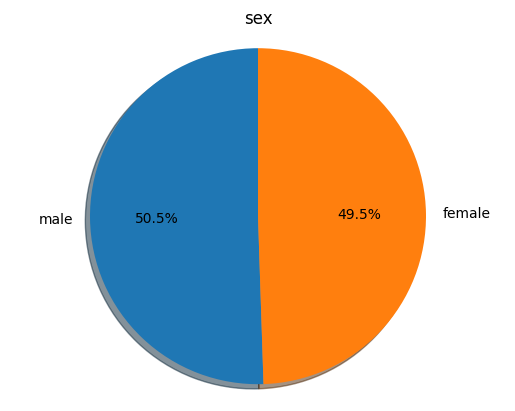

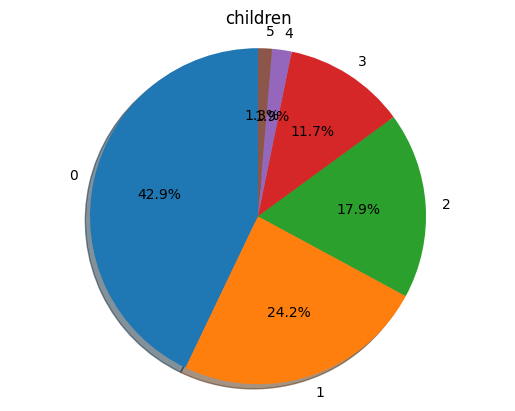

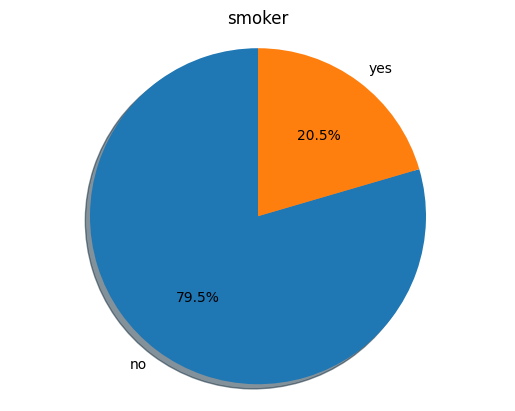

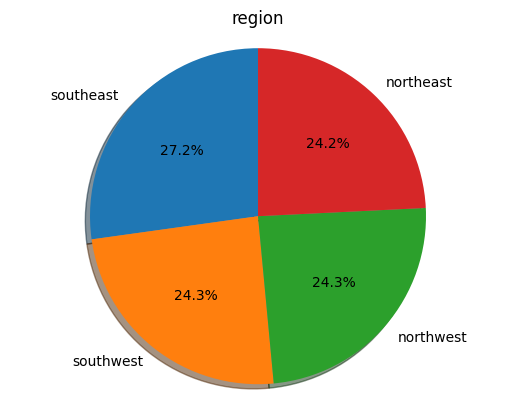

In [ ]:
for i in ['sex', 'children', 'smoker', 'region']:
  count_plotter_1(df, i)

In [ ]:
def count_plotter_2(i , j):
  plt.style.use('ggplot')
  pd.crosstab(i, j).plot.bar()

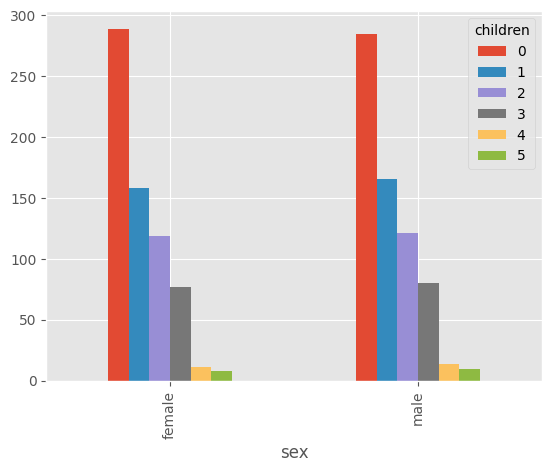

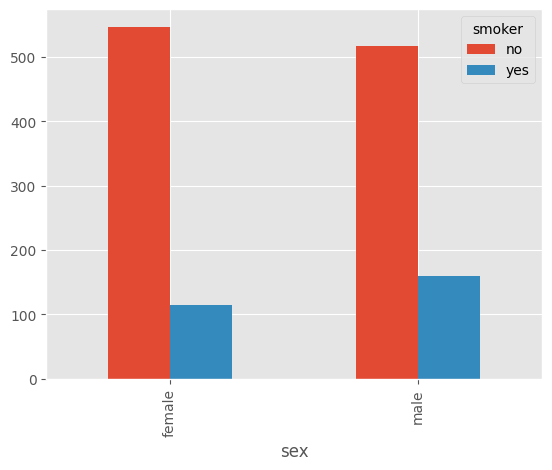

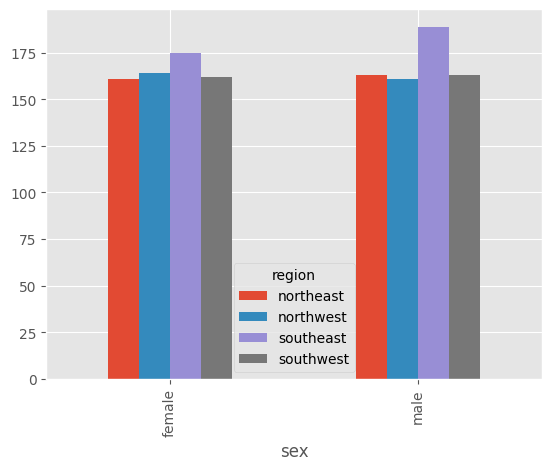

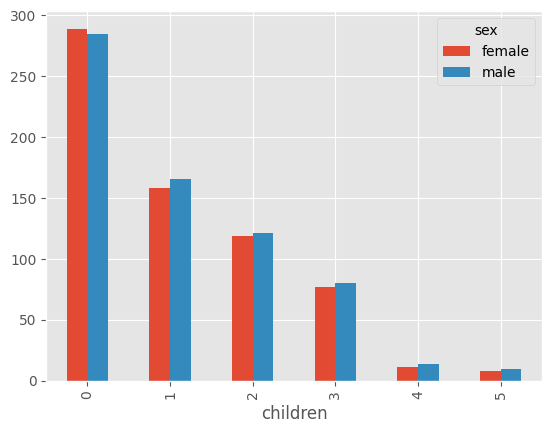

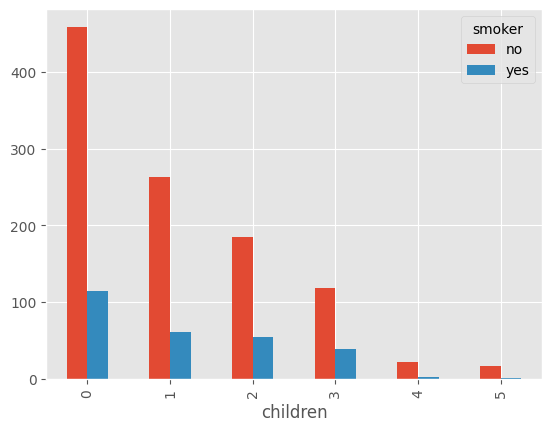

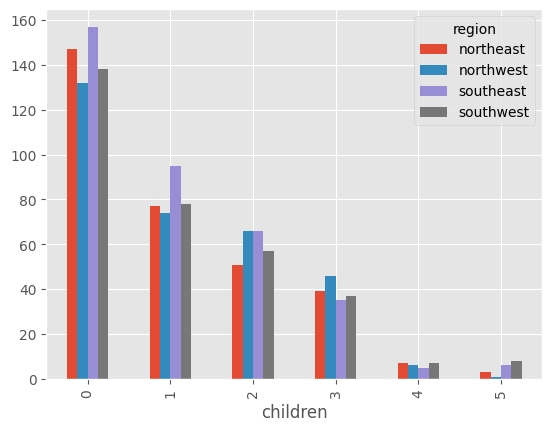

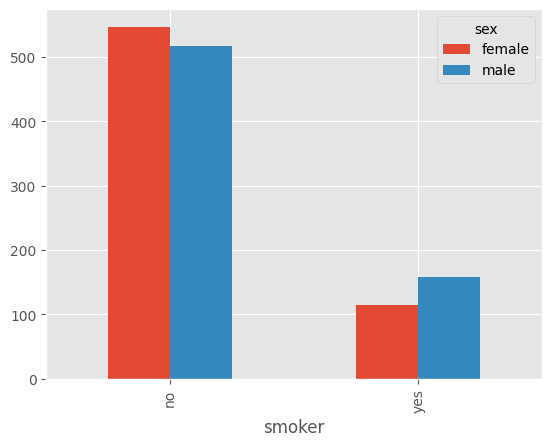

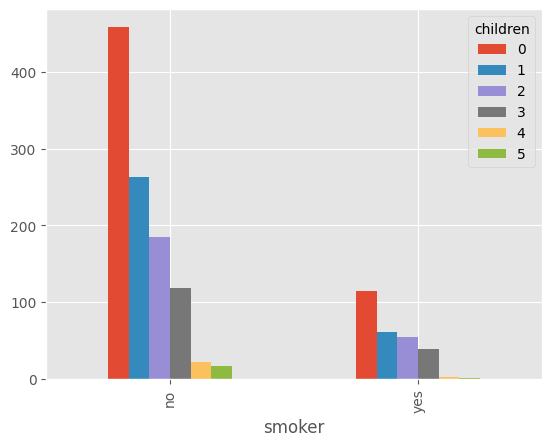

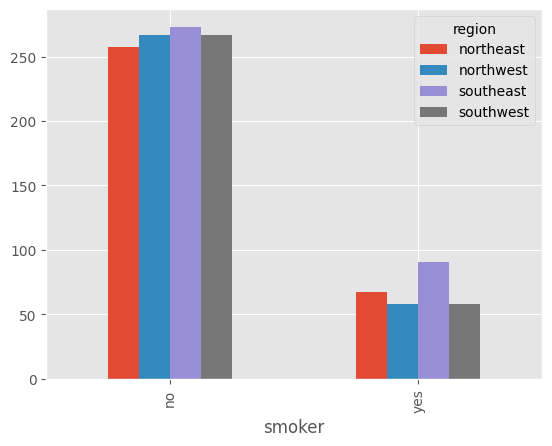

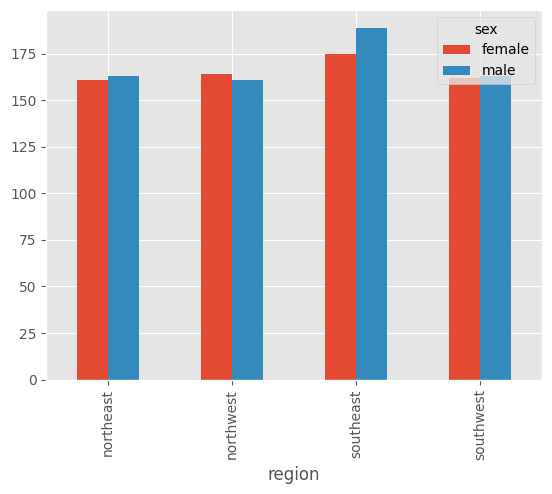

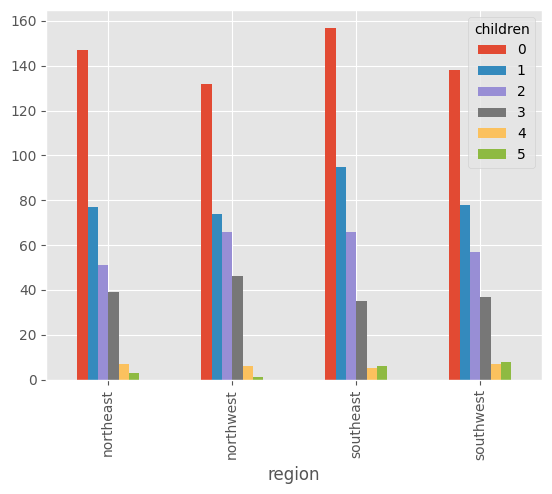

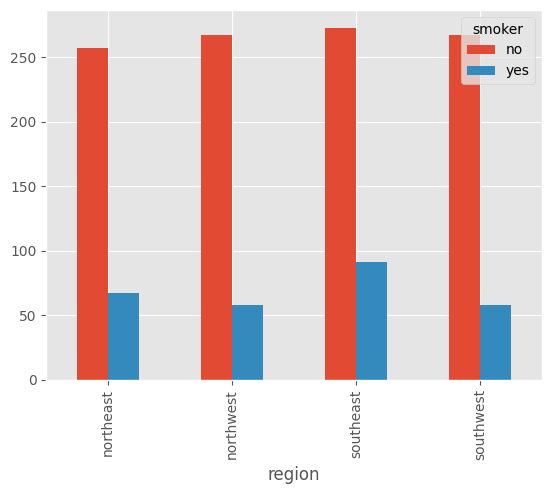

In [ ]:
for i in ['sex', 'children', 'smoker', 'region']:
  for j in ['sex', 'children', 'smoker', 'region']:
    if i!=j:
      count_plotter_2(df[i], df[j])

In [ ]:
def pivot_plotter_1(df_temp, i, k):
    grouped = df_temp.groupby(i).mean()

    plt.style.use('ggplot')

    # Create a bar plot
    grouped.plot(kind='bar', figsize=(10, 6))

    # Set the title and labels for the plot
    plt.title(i +' and Mean '+k )
    plt.xlabel(i)
    plt.ylabel('Mean '+k)
    #plt.xticks(grouped_test16.index.tolist())

    # Show the plot
    plt.show()

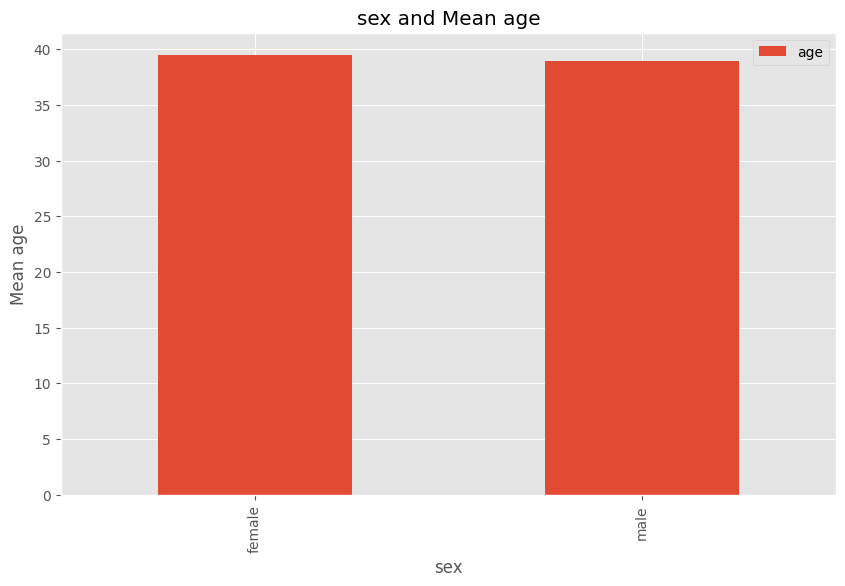

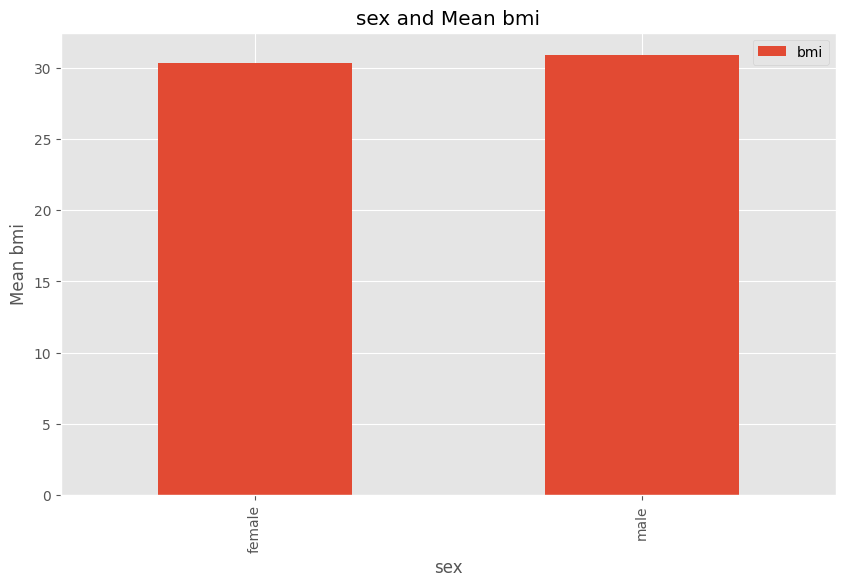

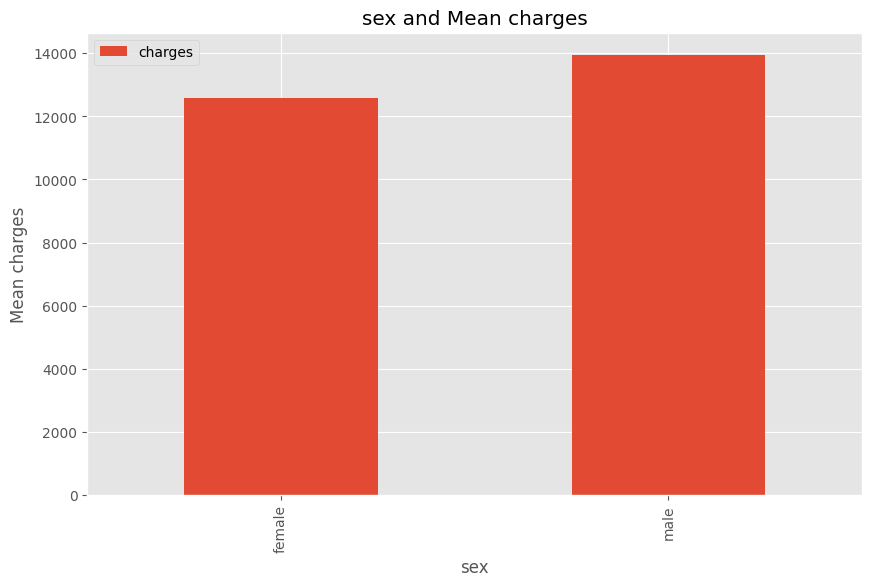

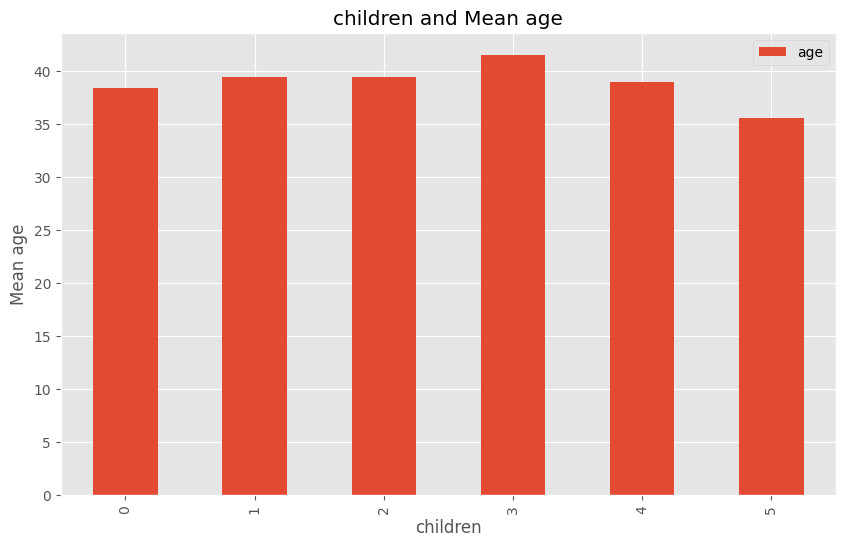

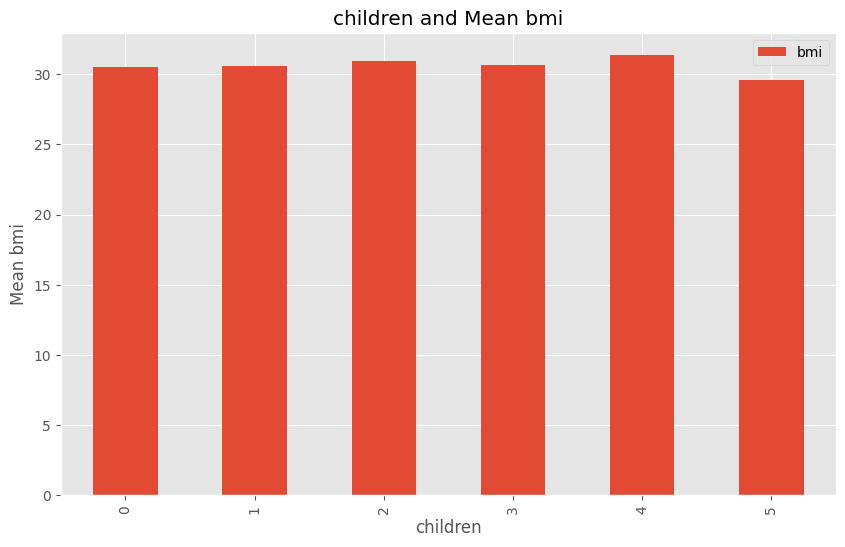

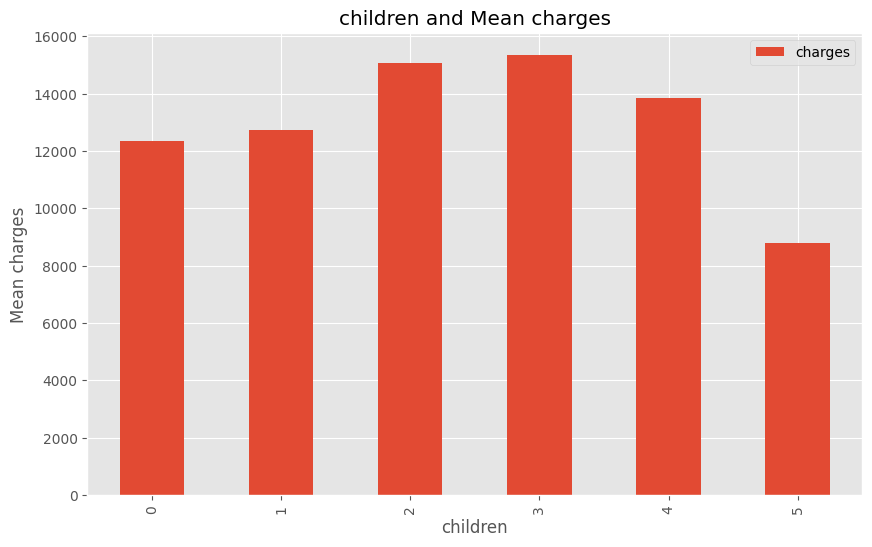

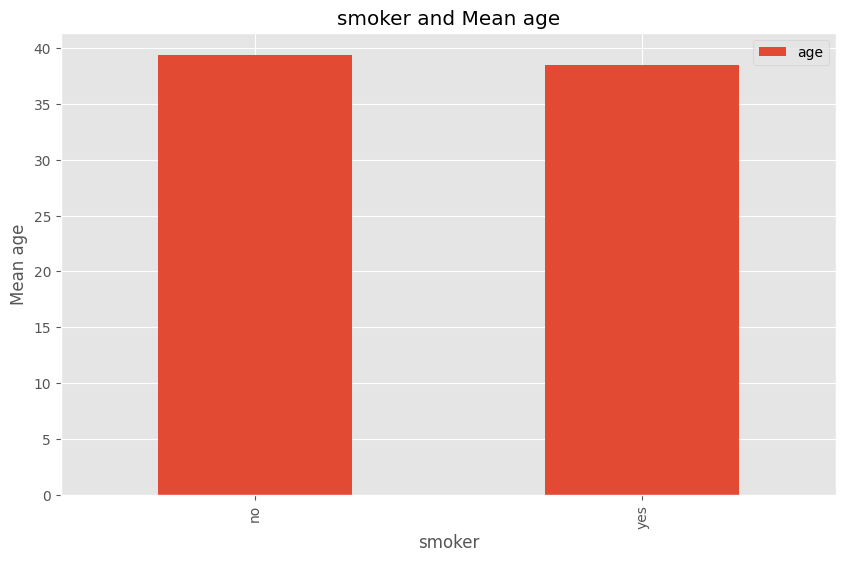

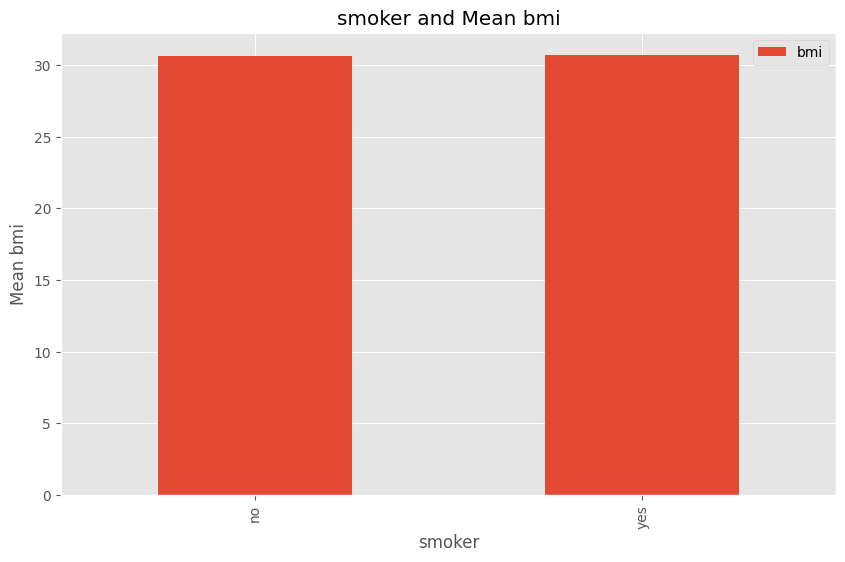

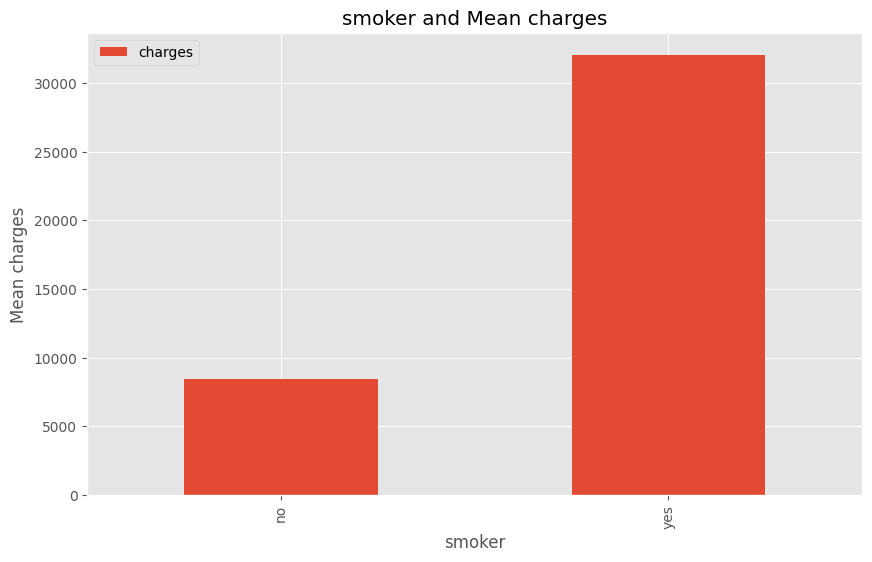

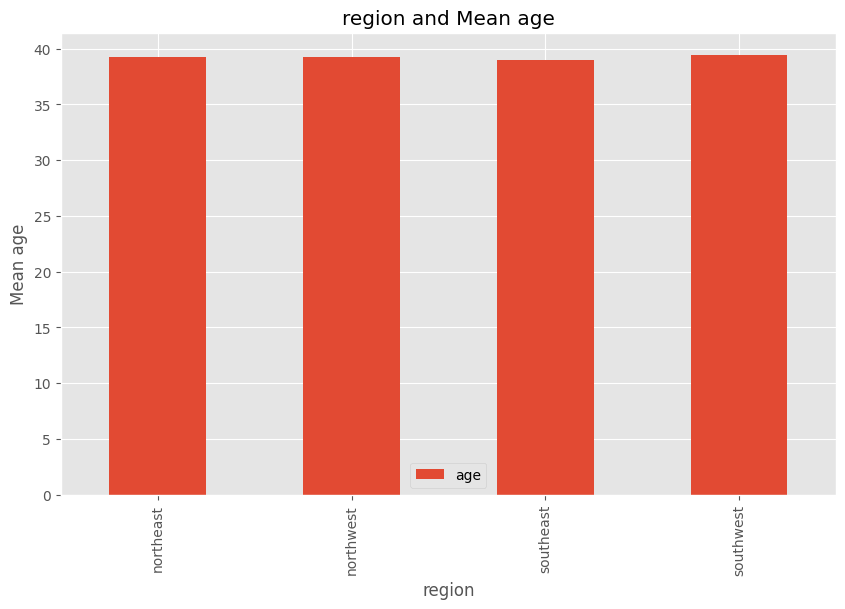

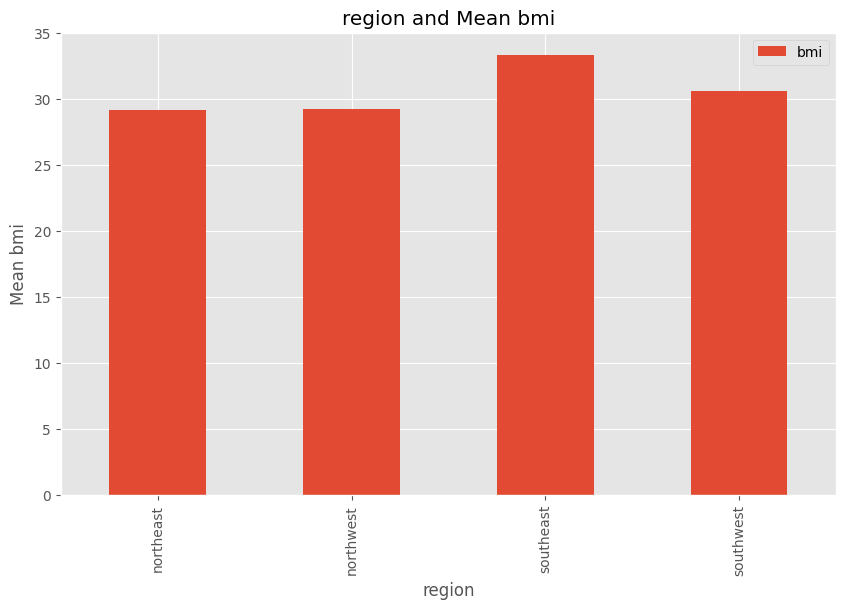

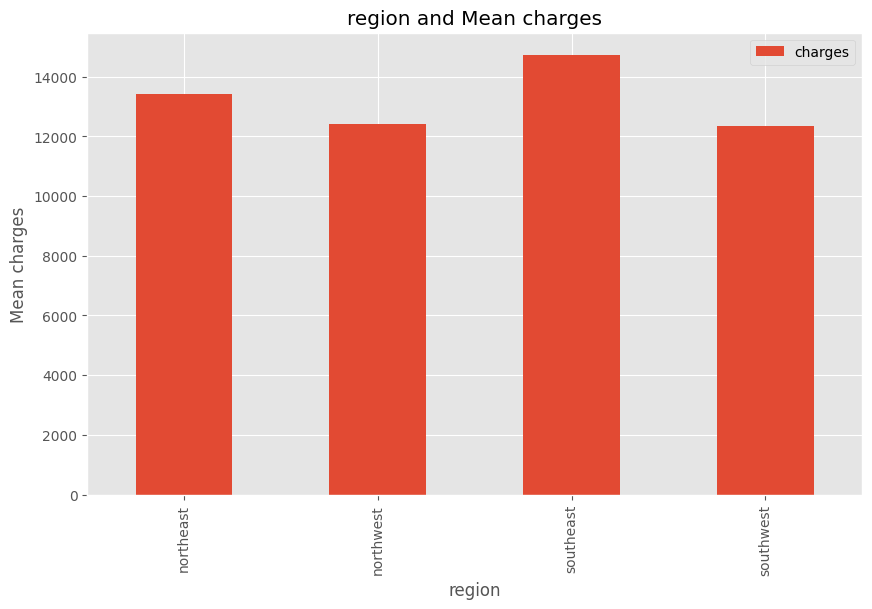

In [ ]:
for i in ['sex', 'children', 'smoker', 'region']:
  for j in ['age', 'bmi', 'charges']:
      pivot_plotter_1(df[[i, j]], i, j)

In [ ]:
def x_y_plot(x, y):
    plt.style.use('ggplot')
    plt.scatter(x,y)
    plt.title(x.name +' vs '+y.name )
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

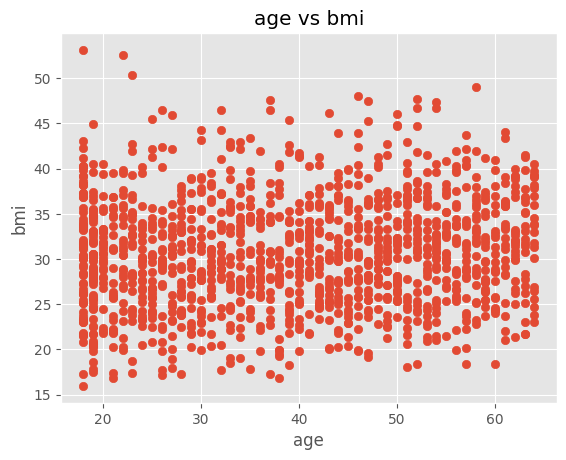

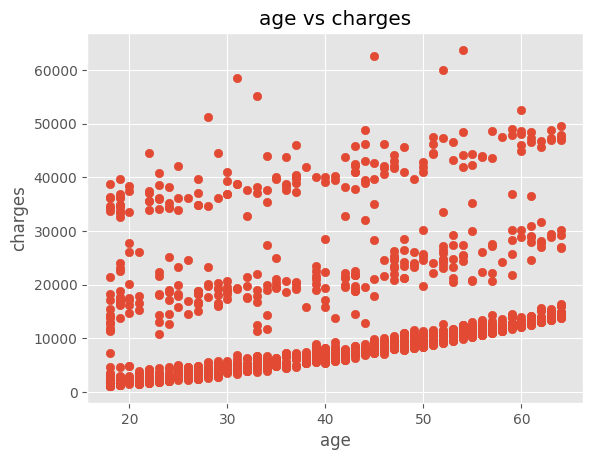

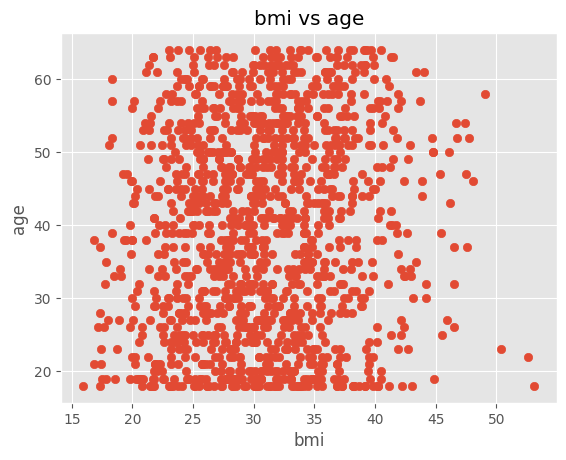

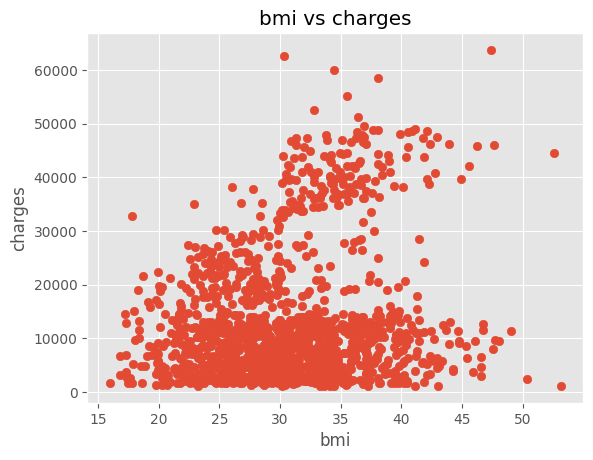

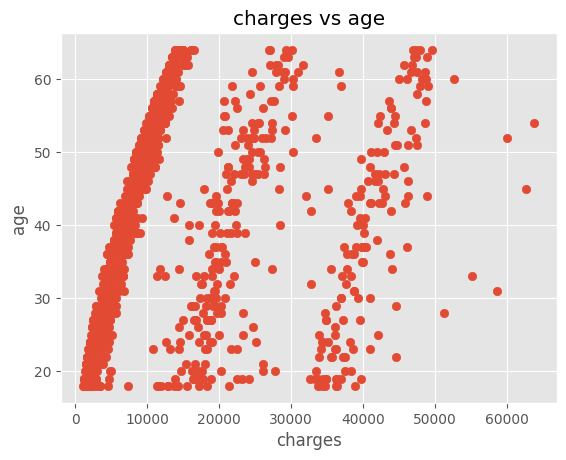

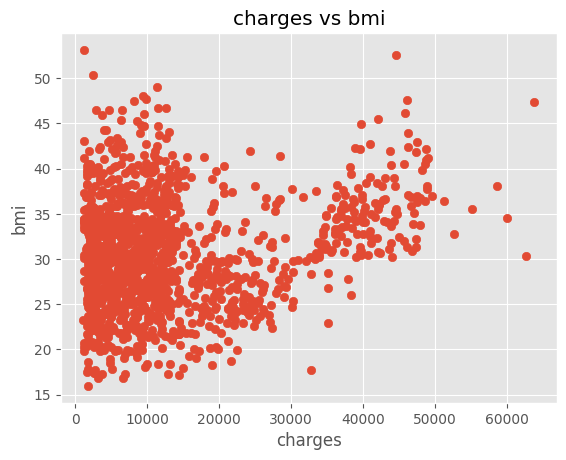

In [ ]:
for i in ['age', 'bmi', 'charges']:
  for j in ['age', 'bmi', 'charges']:
    if i!=j:
        x_y_plot(df[i], df[j])

In [ ]:
df['male'] = df.sex.apply(lambda x: 1 if x=='male' else 0)
df['smoker'] = df.smoker.apply(lambda x: 1 if x=='yes' else 0)
regions = {'southwest':3, 'southeast':0, 'northwest':2, 'northeast':1}
df['region'] = df.region.map(regions)
df.drop(['sex'], axis=1, inplace=True)

In [ ]:
df.head()

age     bmi  children  smoker  region      charges  male
0   19  27.900         0       1       3  16884.92400     0
1   18  33.770         1       0       0   1725.55230     1
2   28  33.000         3       0       0   4449.46200     1
3   33  22.705         0       0       2  21984.47061     1
4   32  28.880         0       0       2   3866.85520     1

In [ ]:
def x_y_plot_2(x, y, cat):
  labels = list(set(cat))
  scatter_plot = plt.scatter(x=x, y=y, c=cat)
  plt.legend(handles=scatter_plot.legend_elements()[0], labels=labels)
  plt.xlabel(x.name)
  plt.ylabel(y.name)
  plt.title(x.name+' vs '+y.name+' with '+cat.name)
  plt.grid()
  plt.show()

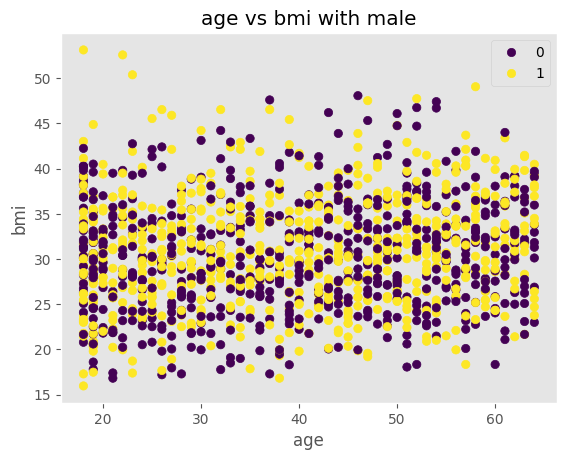

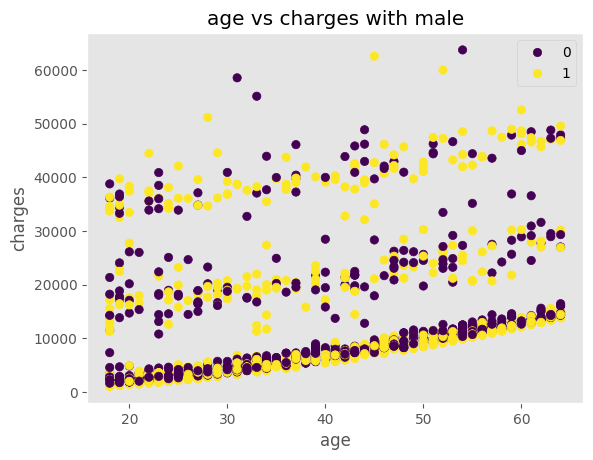

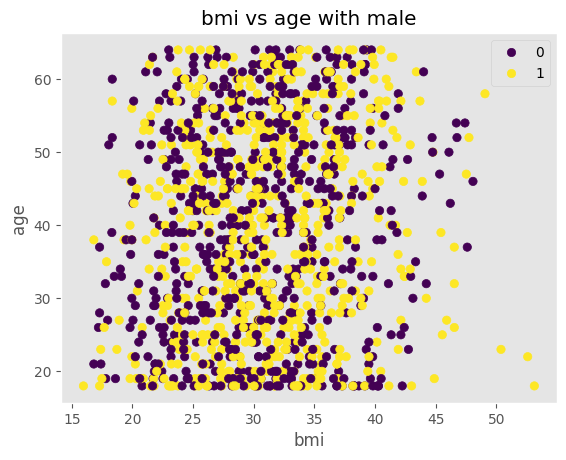

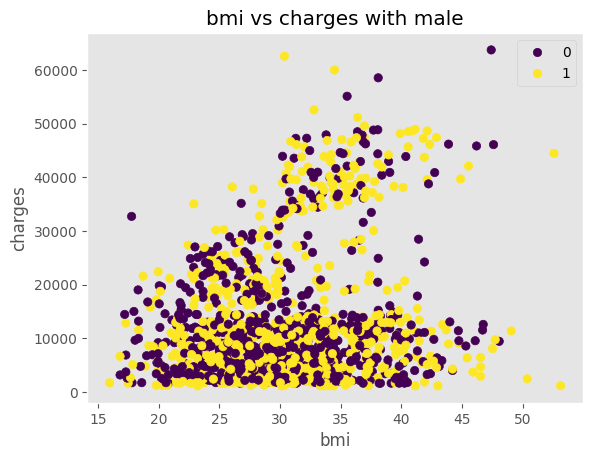

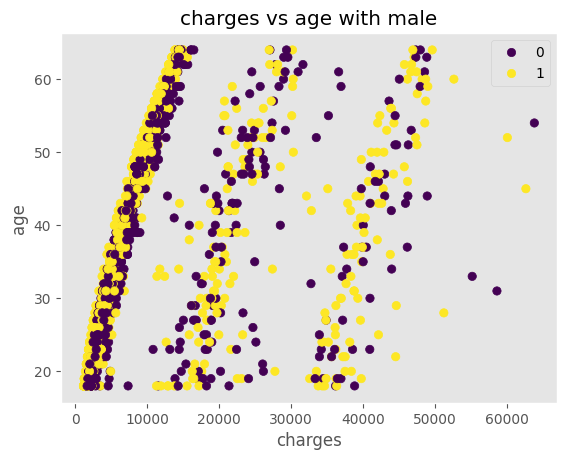

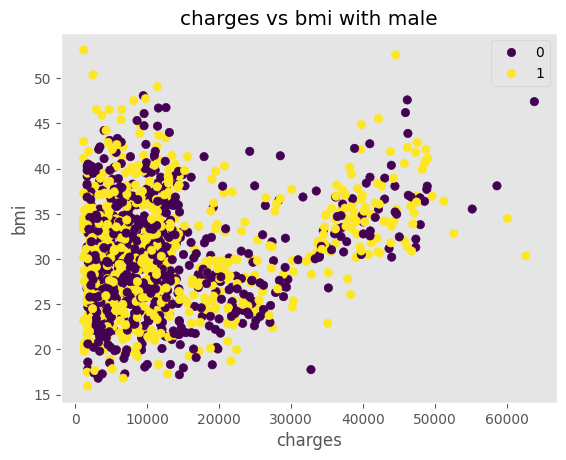

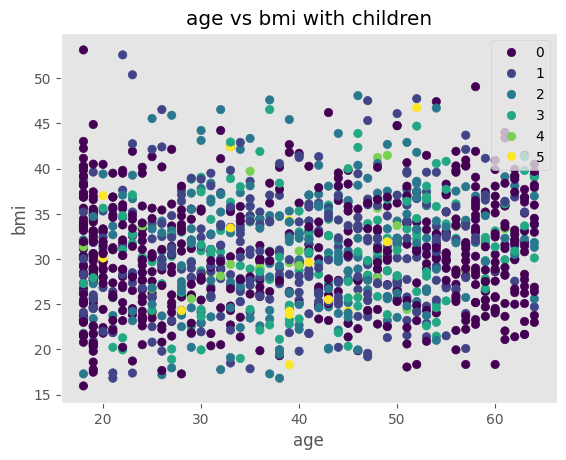

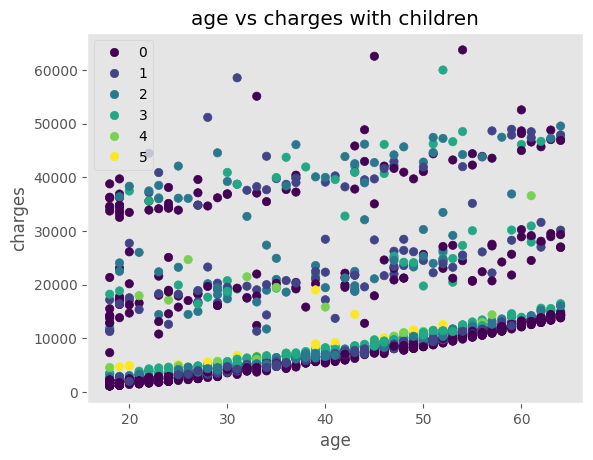

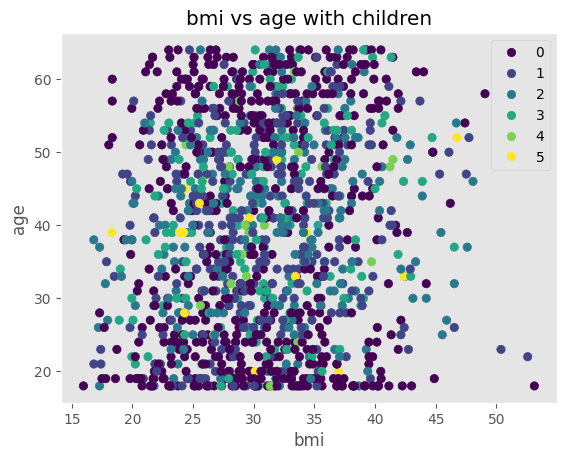

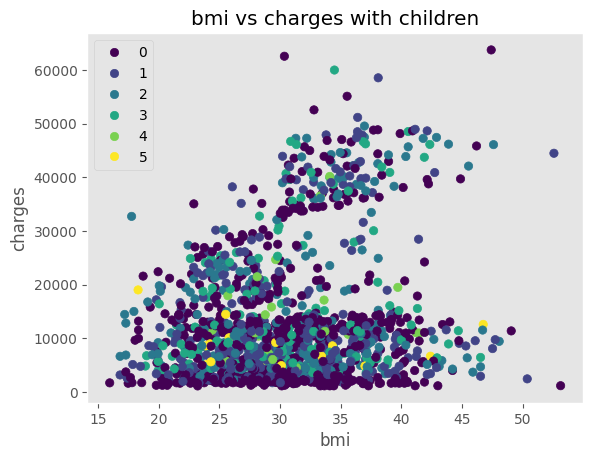

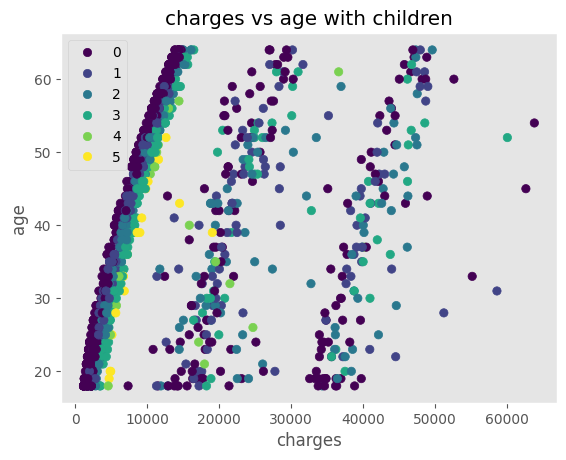

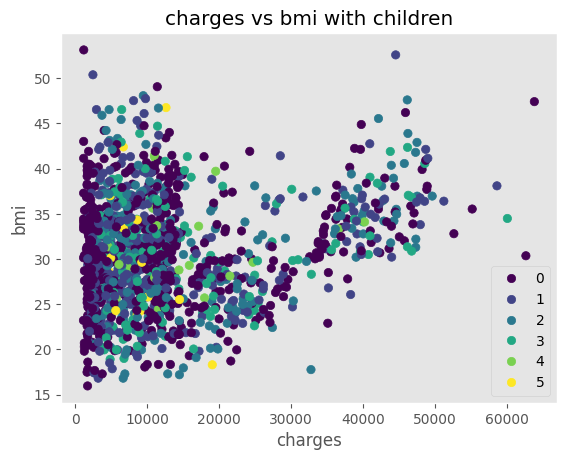

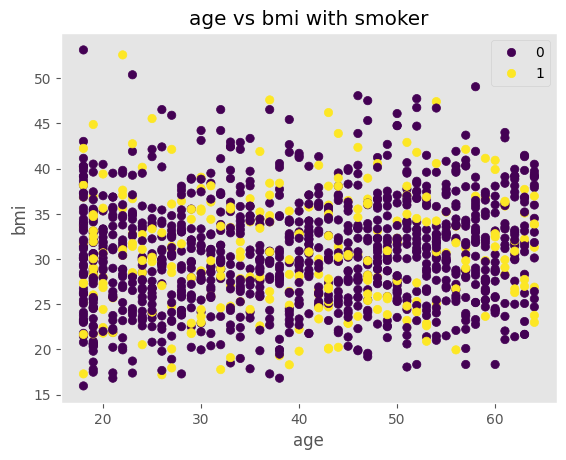

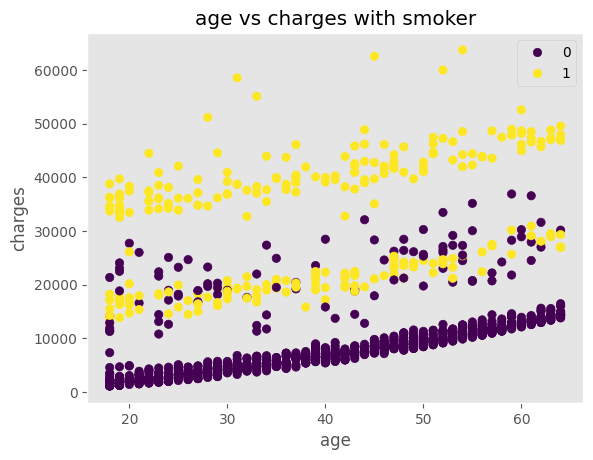

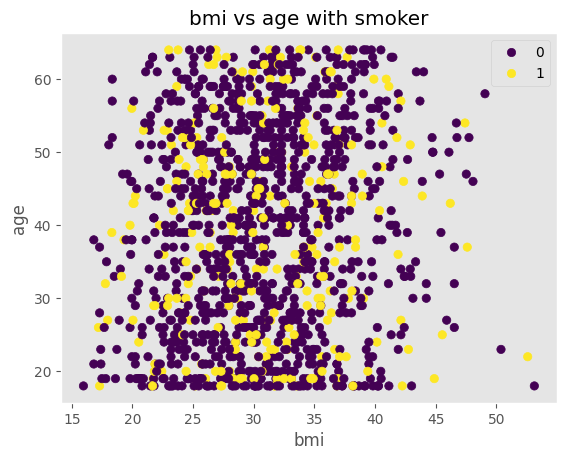

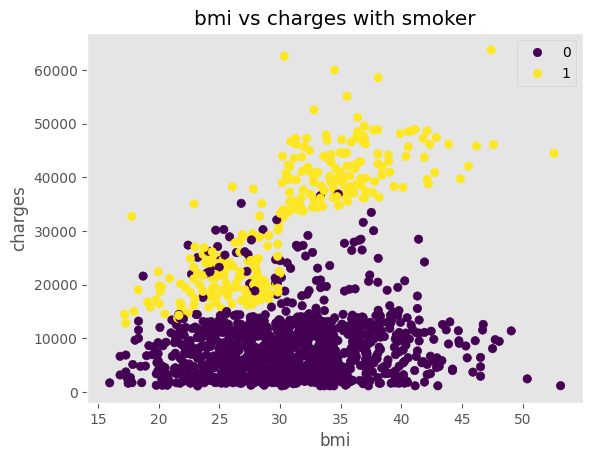

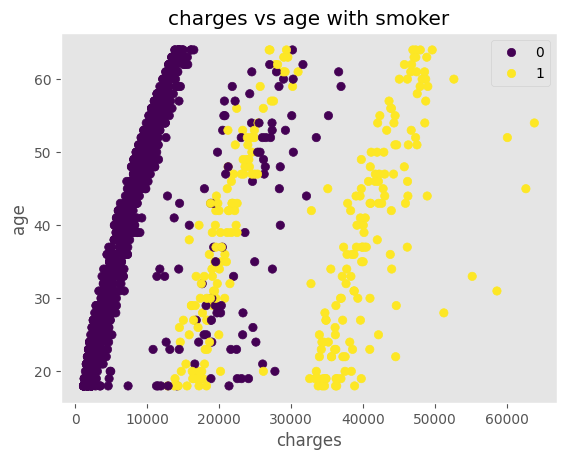

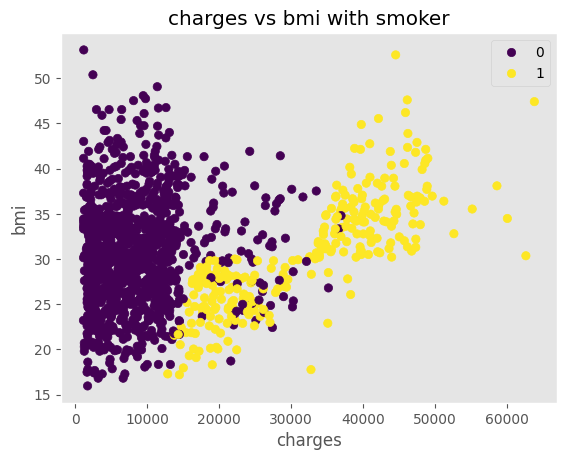

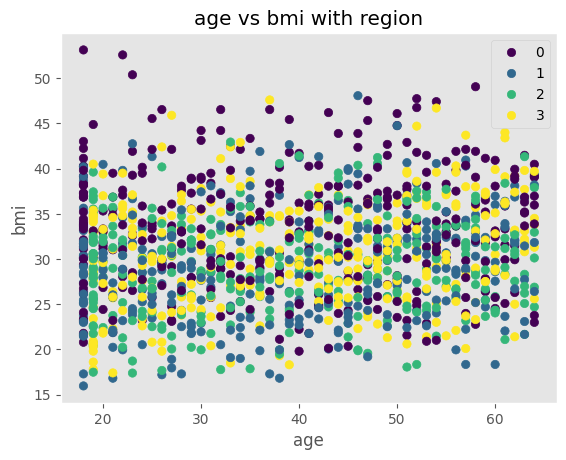

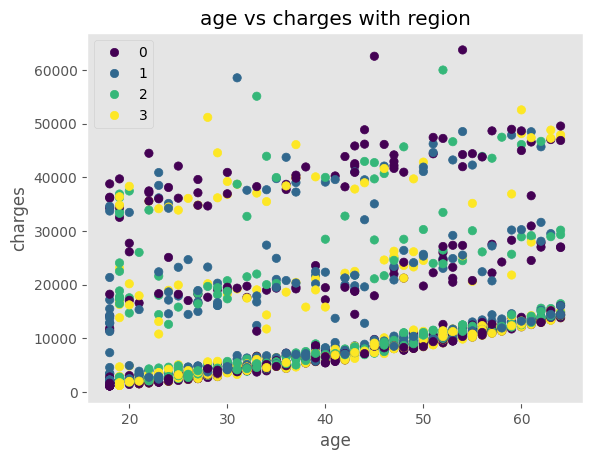

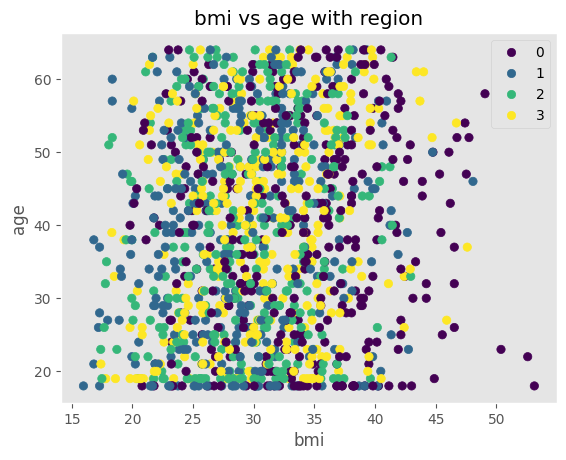

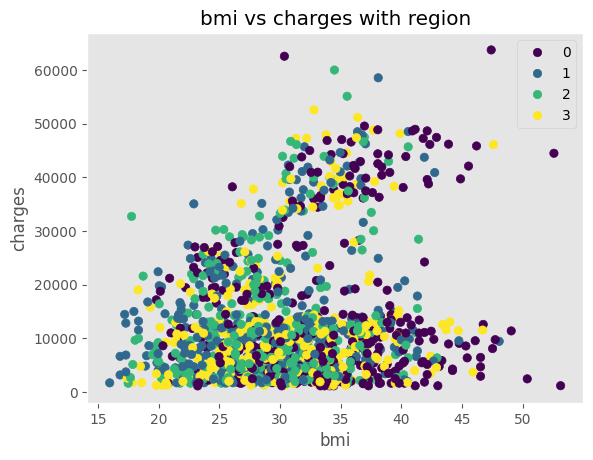

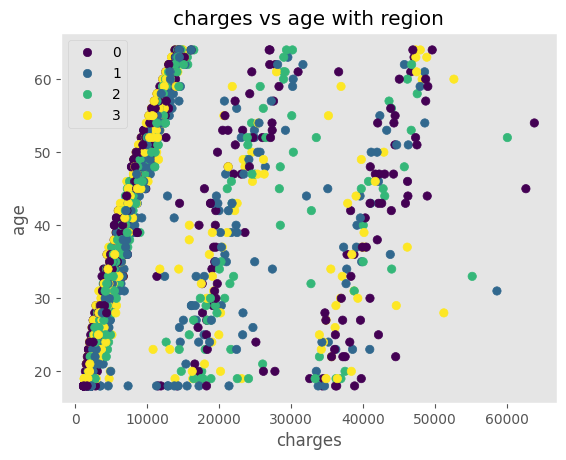

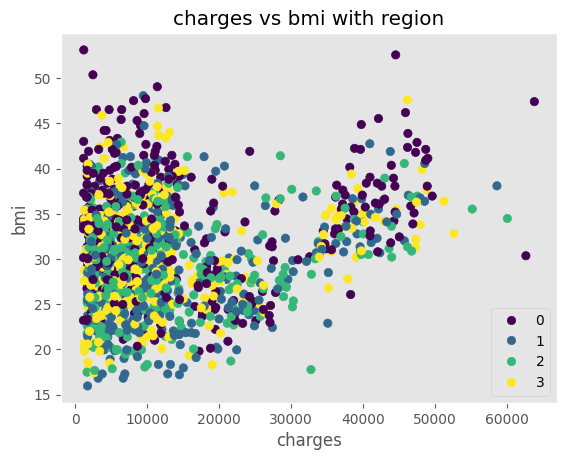

In [ ]:
for k in ['male', 'children', 'smoker', 'region']:
  for i in ['age', 'bmi', 'charges']:
    for j in ['age', 'bmi', 'charges']:
      if i!=j:
          x_y_plot_2(df[i], df[j], df[k])

In [ ]:
y = df.pop('smoker')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

In [ ]:
columns = X_train.columns.tolist()
scaler = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=columns).astype('float32')
X_test = pd.DataFrame(scaler.transform(X_test), columns=columns).astype('float32')

#### Model

In [ ]:
my_model =XGBClassifier()

In [ ]:
my_model.fit(X_train, y_train, verbose = True)
predictions = my_model.predict(X_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
accuracy * 100.0

95.52238805970148

<Axes: >

Text(0.5, 23.52222222222222, 'Predicted Label')

Text(50.722222222222214, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

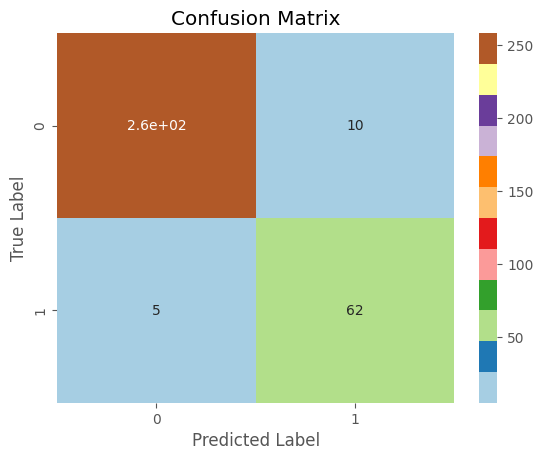

In [ ]:

ax = plt.axes()
sns.heatmap(confusion_matrix( y_test,predictions), annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       268
           1       0.86      0.93      0.89        67

    accuracy                           0.96       335
   macro avg       0.92      0.94      0.93       335
weighted avg       0.96      0.96      0.96       335



-----------

In [ ]:
df['smoker'] = y
y = df.pop('charges')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

In [ ]:
columns = X_train.columns.tolist()
scaler = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=columns).astype('float32')
X_test = pd.DataFrame(scaler.transform(X_test), columns=columns).astype('float32')

#### Model2

In [ ]:
my_model_2 = XGBRegressor()
my_model_2.fit(X_train, y_train, verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predictions = my_model_2.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 2988.0831222441725
